In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv('/Users/julianeoliveira/Documents/Projects/Bruno/Datalake/dados_final_consolidado.csv', sep=';',low_memory=False)


In [3]:
df_des = df[['id_evento_grupo', 'protocolo', 'tipo_documento', 'ibge', 'municipio',
             'uf', 'cobrade', 'regiao', 'tipologia', 'descricao_tipologia',
             'grupo_de_desastre', 'data_inicio', 'data_fim']]

In [6]:
df_des = df_des.assign(data_inicio = pd.to_datetime(df_des.data_inicio),
                      data_fim = pd.to_datetime(df_des.data_fim),
                      year_inicio = pd.DatetimeIndex(df_des.data_inicio).year,
                      year_fim = pd.DatetimeIndex(df_des.data_fim).year,
                      month_inicio = pd.DatetimeIndex(df_des.data_inicio).month,
                      month_fim = pd.DatetimeIndex(df_des.data_fim).month,
                      ones = 1)

In [7]:
df_des = df_des[(df_des.year_inicio >= 2005) & (df_des.descricao_tipologia != 'Doenças infecciosas') & (df_des.descricao_tipologia != 'Outros')]

In [9]:
df_des.data_inicio.max()

Timestamp('2022-12-30 00:00:00')

In [8]:
df_des[df_des.data_inicio == df_des.data_inicio.min()]

,id_evento_grupo,protocolo,tipo_documento,ibge,municipio,uf,cobrade,regiao,tipologia,descricao_tipologia,grupo_de_desastre,data_inicio,data_fim,year_inicio,year_fim,month_inicio,month_fim,ones
18547,2610905_14110_5,PE-A-2610905-14110-20050101,A,2610905,Pesqueira,PE,14110,Nordeste,4,Estiagem e Seca,Climatológico,2005-01-01,2005-01-01,2005,2005,1,1,1
28715,3113800_12200_2,MG-A-3113800-12200-20050101,A,3113800,Carmésia,MG,12200,Sudeste,2,Enxurradas,Hidrológico,2005-01-01,2005-01-01,2005,2005,1,1,1
33516,3154606_13215_2,MG-A-3154606-13215-20050101,A,3154606,Ribeirão das Neves,MG,13215,Sudeste,12,Vendavais e Ciclones,Meteorológico,2005-01-01,2005-01-01,2005,2005,1,1,1
35828,3201407_12200_1,ES-A-3201407-12200-20050101,A,3201407,Castelo,ES,12200,Sudeste,2,Enxurradas,Hidrológico,2005-01-01,2005-01-01,2005,2005,1,1,1
48881,4213351_14110_1,SC-A-4213351-14110-20050101,A,4213351,Ponte Alta do Norte,SC,14110,Sul,4,Estiagem e Seca,Climatológico,2005-01-01,2005-01-01,2005,2005,1,1,1


# Descriptive analysis 

In [62]:
df_des.groupby(['grupo_de_desastre','descricao_tipologia'])['ones'].count().reset_index()

,grupo_de_desastre,descricao_tipologia,ones
0,Climatológico,Estiagem e Seca,20921
1,Climatológico,Incêndio Florestal,1546
2,Climatológico,Onda de Calor e Baixa Umidade,83
3,Climatológico,Onda de Frio,205
4,Hidrológico,Alagamentos,1629
5,Hidrológico,Chuvas Intensas,4969
6,Hidrológico,Enxurradas,6150
7,Hidrológico,Inundações,4434
8,Hidrológico,Movimento de Massa,1360
9,Meteorológico,Granizo,1387


In [63]:
teste = df_des.groupby(['grupo_de_desastre','descricao_tipologia','year_inicio'])['ones'].count().reset_index()

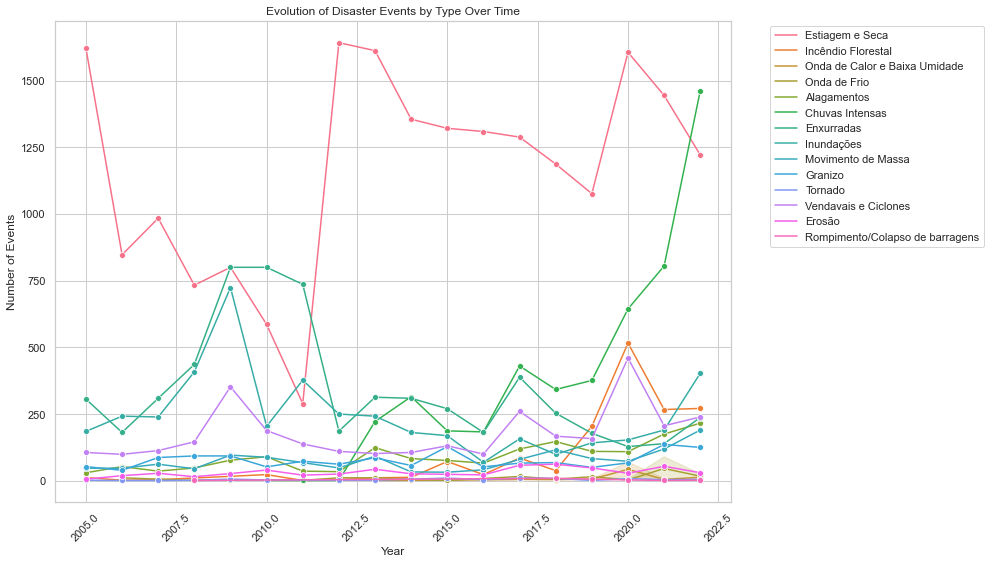

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=teste, x="year_inicio", y="ones", hue="descricao_tipologia", marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Evolution of Disaster Events by Type Over Time")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.tight_layout()
plt.show()


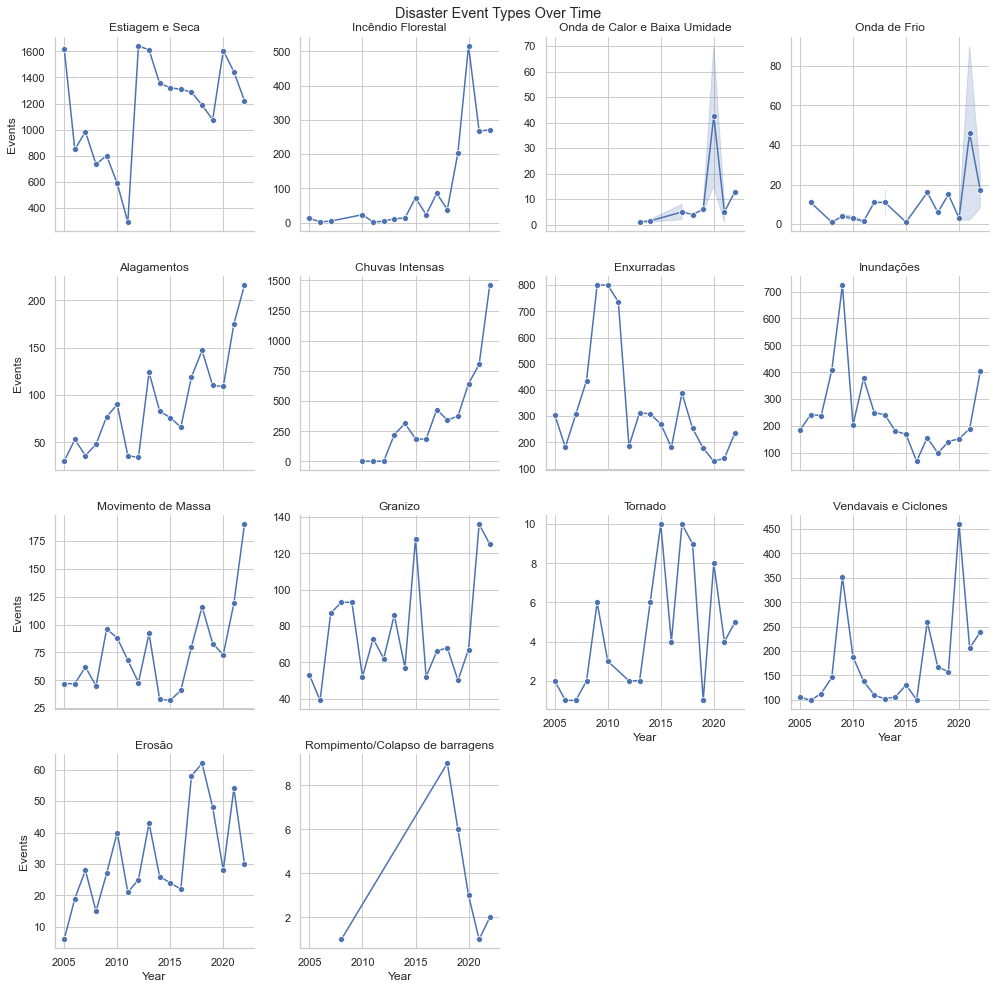

In [65]:
g = sns.FacetGrid(teste, col="descricao_tipologia", col_wrap=4, height=3.5, sharey=False)
g.map(sns.lineplot, "year_inicio", "ones", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Events")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Disaster Event Types Over Time")
plt.show()


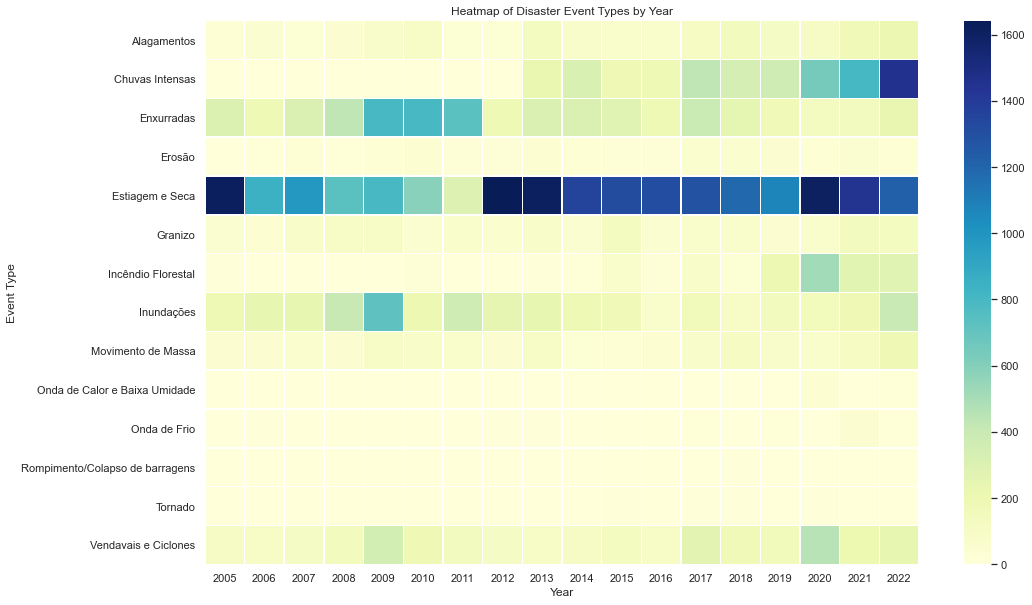

In [66]:
pivot = teste.pivot_table(index="descricao_tipologia", columns="year_inicio", values="ones", fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("Heatmap of Disaster Event Types by Year")
plt.xlabel("Year")
plt.ylabel("Event Type")
plt.show()


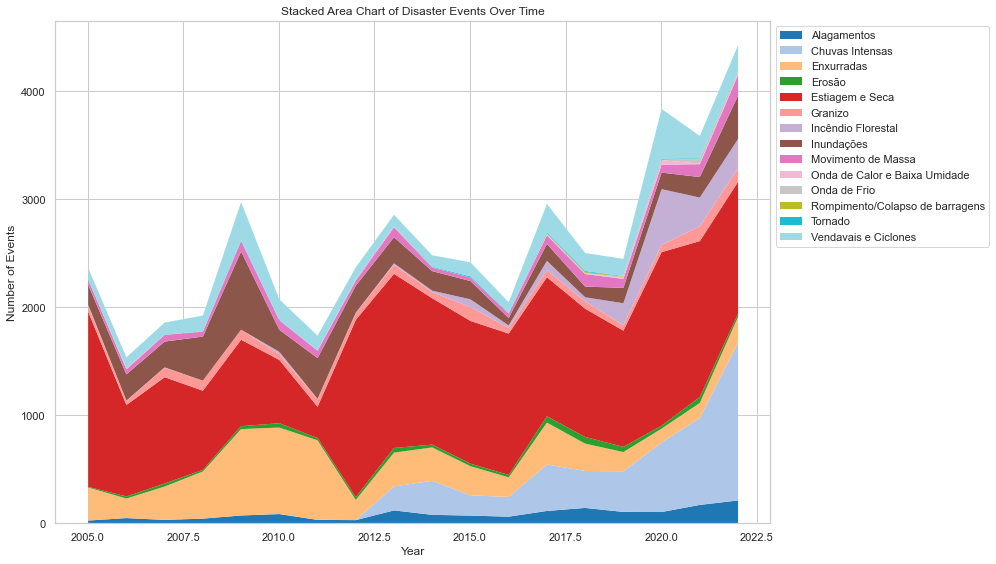

In [67]:
pivot_area = teste.pivot_table(index="year_inicio", columns="descricao_tipologia", values="ones", fill_value=0)

pivot_area.plot.area(figsize=(14, 8), cmap="tab20", linewidth=0)
plt.title("Stacked Area Chart of Disaster Events Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
